1. Organization of the report (10 pts)

2. Problem statement/statement (5 pts): Clearly state the project's objectives.

3. Related work (30 pts):  You need to regenerate (approximately) the results on the original report.

4. Design your own model (25 pts)  (You can include more than one model).

     a. You can state the potential drawback of their analyses and then lead to your model. Why is your model better?

    b. You can ask some interesting questions which the previous blog didn't answer.

5. Results (20 pts). Present your results.

6. Discussion and conclusions (10 pts)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [2]:
df = pd.read_csv('Airports2.csv')

In [3]:
label = df['Distance']/df['Flights']
label = pd.DataFrame(label)
df['profit'] = label
df1 = df.dropna()


In [4]:
df1.describe()
df1['profit']

1            4.681818
2            5.421053
3           25.750000
4          156.000000
5          156.000000
              ...    
3606797      1.724638
3606798      2.333333
3606799      2.203704
3606800      1.776119
3606801    146.000000
Name: profit, Length: 3593852, dtype: float64

(array([3.149866e+06, 2.705490e+05, 1.008230e+05, 3.317700e+04,
        1.956600e+04, 6.472000e+03, 1.899000e+03, 3.720000e+02,
        2.780000e+02, 8.200000e+01]),
 array([   0. ,  501.8, 1003.6, 1505.4, 2007.2, 2509. , 3010.8, 3512.6,
        4014.4, 4516.2, 5018. ]),
 <a list of 10 Patch objects>)

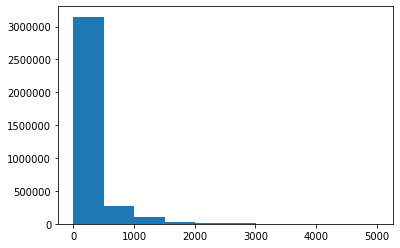

In [5]:
df2 = df1.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
df2 = df1[df1.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

df2.columns
plt.hist(df2['profit'])

In [6]:
df2['profit'].loc[(df2['profit'] < 50)] = 0
df2['profit'].loc[(df2['profit'] >= 50) & (df2['profit'] < 100)] = 1
df2['profit'].loc[(df2['profit'] >= 100) & (df2['profit'] < 200)] = 2
df2['profit'].loc[(df2['profit'] >= 200) & (df2['profit'] < 500)] = 3
df2['profit'].loc[(df2['profit'] >= 500) & (df2['profit'] < 1000)] = 4
df2['profit'].loc[(df2['profit'] >= 1000) & (df2['profit'] < 2000)] = 5
df2['profit'].loc[(df2['profit'] > 2000)] = 6

/Users/sneha/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/sneha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/sneha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [7]:
df2

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,profit
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,0.0
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,0.0
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150001,0.0
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,2.0
5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.374199,-122.873001,44.254101,-121.150001,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606797,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",292,1311,69,119,2009-06-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,0.0
3606798,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",281,969,51,119,2009-02-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,0.0
3606799,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",245,1026,54,119,2009-11-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,0.0
3606800,STL,TBN,"St. Louis, MO","Fort Leonard Wood, MO",363,1273,67,119,2009-08-01,2828990,46457,38.748699,-90.370003,37.741600,-92.140701,0.0


In [8]:
#classification problem

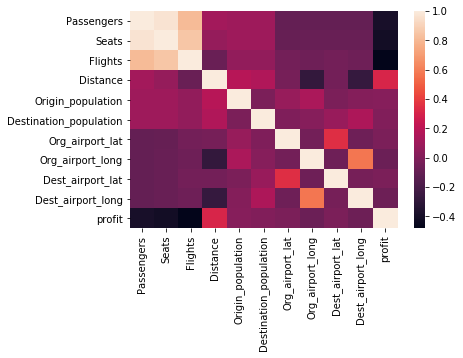

In [9]:
sns.heatmap(df2.corr())

In [10]:
feature_cols = ['Distance','Origin_population','Destination_population']
x = df2[['Distance','Origin_population','Destination_population']]
x = x.values
y = df2[['profit']]
y = y.values
x.shape

#profit used as the label

(3583084, 3)

In [11]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=None, max_leaf_nodes=10)
clf



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
y_pred = clf.predict(X_test)

In [14]:
y_pred

array([1., 0., 0., ..., 2., 0., 0.])

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6067109673494107


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[209417,  27804,  25617,  37068,  25225,  10720,      0],
       [  3560,   5178,   1474,   1333,   1052,    639,   2555],
       [    47,    280,    868,    799,    364,    230,    340],
       [     0,      0,      0,      0,      0,      0,      0],
       [     0,      0,      0,      0,      0,      0,      0],
       [   702,    246,    255,    323,    286,   1927,      0],
       [     0,      0,      0,      0,      0,      0,      0]])

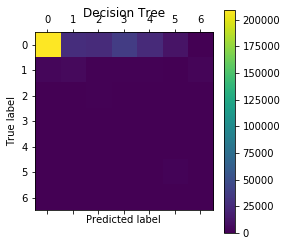

In [17]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Decision Tree')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

/Users/sneha/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred  =  classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_nb = confusion_matrix(y_test, y_pred)
ac_nb = accuracy_score(y_test,y_pred)
ac_nb

0.5976126750932854

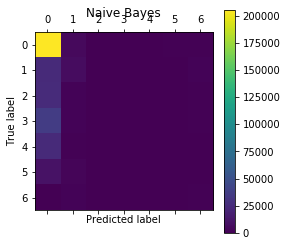

In [22]:
plt.matshow(cm_nb)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Naive Bayes')
plt.show()

In [23]:
x = df2[['Passengers','Seats','Flights','Distance','Origin_population','Destination_population']]
x = x.values
y = df2[['profit']]
y = y.values
x.shape

(3583084, 6)

In [24]:
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from tensorflow.python.keras.metrics import Metric
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Dropout, Activation
from keras.models import Model
from keras import optimizers
from keras import initializers


In [25]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical


In [26]:

##############################################################
x = df2[['Passengers','Seats','Flights','Distance','Origin_population','Destination_population']]
print(x)
x = x.values
y = df2[['profit']]
y = y.values
print("Shape of X",x.shape)
print("Shape of y",y.shape)



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)
# y_train=np_utils.to_categorical(y_train,num_classes=7)
# y_test=np_utils.to_categorical(y_test,num_classes=7)


model=Sequential()
model.add(Dense(1000,input_dim=6,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

         Passengers  Seats  Flights  Distance  Origin_population  \
1                41    396       22       103             284093   
2                88    342       19       103             284093   
3                11     72        4       103             284093   
4                 0     18        1       156             147300   
5                11     18        1       156             147300   
...             ...    ...      ...       ...                ...   
3606797         292   1311       69       119            2828990   
3606798         281    969       51       119            2828990   
3606799         245   1026       54       119            2828990   
3606800         363   1273       67       119            2828990   
3606801           2     19        1       146              93712   

         Destination_population  
1                         76034  
2                         76034  
3                         76034  
4                         76034  
5            

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              7000      
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 300)               150300    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 7)                 707       
                                                                 
Total params: 688,607
Trainable params: 688,607
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=20, epochs = 10, verbose = 1)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
161232/161239 [============================>.] - ETA: 0s - loss: 0.0811 - accuracy: 0.9683WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x1a1c778378> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

In [30]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Accuracy of the dataset 98.57971750639811


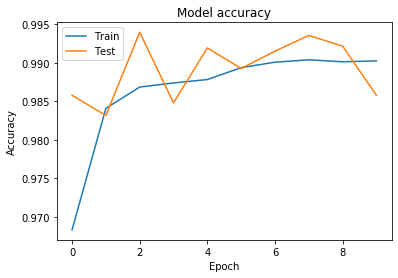

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

https://www.kaggle.com/louisong97/neural-network-approach-to-iris-dataset
https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5